In [50]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [51]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [52]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images = images / 255
images.shape

(20, 784)

In [53]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [54]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

In [55]:
def get_discount_matrix(size, rev = False, cor_supr_size=0):
    a = np.arange(size)
    if rev:
        a = np.abs(np.abs(a - a[np.newaxis].T) - np.max(a))
    else:
        a = np.abs(a - a[np.newaxis].T)
    np.fill_diagonal(a, 0)

    if cor_supr_size > 0:
        a[:cor_supr_size] = 0
        a[:, 0:cor_supr_size] = 0
        a[-cor_supr_size:] = 0
        a[:, -cor_supr_size:] = 0

    return a

# a = get_discount_matrix(10, rev=True, cor_supr_size=2)
# a = np.array(a, dtype='float')
# # a[:, 0:2] = 0
# print(a)
# show_image(a, cmap='Greys')

In [56]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

In [57]:
I = np.zeros(n_mnist_pixels)
O = np.zeros(n_mnist_pixels)

# W = np.random.rand(O.size, I.size) - 0.5
W = np.random.normal(0, 0.1, (O.size, I.size))
print(W.max(), W.min())

train_images_idx = [0, 10]

eps0 = 0.01

epoch_cnt = 100

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0

    img_out = []

    for img_idx in train_images_idx:
        I = images[img_idx]

        O.fill(0)

        out = []

        last_iter = 0
        
        for iter_idx in range(100):
            # show_image(image=I.reshape(img_side, img_side))

            SO = I * W
            dO = np.sum(SO, axis=1)

            O += dO

            O *= (O > 0) 

            O /= np.max(O) + 1e-30

            prev_diff = np.abs(I - O).sum()

            out.append(prev_diff)
            # out.append((O > 0).sum())
            # out.append(np.mean(O))

            # print(f'{prev_diff=}')
            
            last_iter += 1

            if prev_diff < 0:
                break

            # recur
            I = np.copy(O)

        dW = I - W * O[np.newaxis].T
        dW /= np.max(np.abs(dW)) + 1e-50
        # dW *= (O > 0)[np.newaxis].T

        W += dW * eps
        
        img_out.append(np.copy(O))

        # simple_plot(T=out)
        print(f'{last_iter=}')

    diff = np.abs(img_out[0] - img_out[1]).sum()
    print(f'{diff=}')

0.4920215060497265 -0.4709424877683581
last_iter=100
last_iter=100
diff=624.5551384983916
last_iter=100
last_iter=100
diff=3.0044471664622385
last_iter=100
last_iter=100
diff=22.386093067025524
last_iter=100
last_iter=100
diff=77.480585755332
last_iter=100
last_iter=100
diff=96.78905553504035
last_iter=100
last_iter=100
diff=110.8137350829588
last_iter=100
last_iter=100
diff=124.69193950981163
last_iter=100
last_iter=100
diff=134.64919713918087
last_iter=100
last_iter=100
diff=142.31661594103565
last_iter=100
last_iter=100
diff=148.43042884162566
last_iter=100
last_iter=100
diff=153.70641632117815
last_iter=100
last_iter=100
diff=158.57589718029885
last_iter=100
last_iter=100
diff=162.88756641469104
last_iter=100
last_iter=100
diff=168.04748353268945
last_iter=100
last_iter=100
diff=172.97497088348786
last_iter=100
last_iter=100
diff=177.6080366211596
last_iter=100
last_iter=100
diff=181.9427956772806
last_iter=100
last_iter=100
diff=185.90211271815662
last_iter=100
last_iter=100
diff=

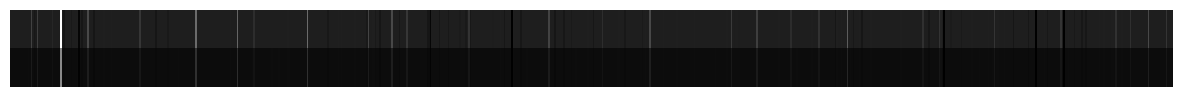

In [58]:
diff_img_arr = np.array([img_out[0], img_out[1]])
figure(figsize=(15, 1))

imshow(np.array(diff_img_arr),
       interpolation='none',
       aspect='auto',
       cmap='Greys',
       )

axis("off")

show()

In [59]:
out_arr = np.array(out)
out_arr.min()

img_out[0]

array([0.99818591, 0.99819935, 0.99818591, 0.99819032, 0.99818591,
       0.99818578, 0.99818591, 0.99818582, 0.99818591, 0.99818591,
       0.99818591, 0.9981859 , 0.99814914, 0.99818343, 0.99638745,
       0.99818591, 0.99861049, 0.99833036, 0.99647827, 0.99818591,
       0.99818591, 0.99818591, 0.99818591, 0.99818591, 0.99818591,
       0.99818591, 0.99818464, 0.99818591, 0.99768145, 0.99818591,
       0.99818591, 0.99818591, 0.99818394, 0.99818458, 0.98230112,
       0.99819658, 0.99862498, 0.99818591, 0.99818591, 0.99818586,
       0.99818591, 0.99844727, 0.99818591, 0.9981859 , 0.99818591,
       0.99807732, 0.99959631, 0.9981859 , 0.99861884, 0.99818591,
       0.99818581, 0.99818591, 0.99605312, 0.99818591, 0.99818591,
       0.99818767, 0.99863845, 0.99818591, 0.99818591, 0.99818591,
       0.99818591, 0.99819892, 0.99818591, 0.99808763, 0.99818591,
       0.99818584, 0.99818591, 0.99818591, 0.99812203, 0.99818563,
       0.99818418, 0.99818591, 0.99818591, 0.99818591, 0.99818